In [1]:
from utils import *
from scipy.stats import norm
import pathlib
import itertools as it

# Toy Examples

## Toy Example 1 (with small finite $\mathcal{X}$ and $\mathcal{F}$)

In [2]:
size_X = 3
size_F = 3
domain_X = range(1, size_X + 1)
domain_F = range(1, size_F + 1)
deviations = np.array([[1, 3, 2], [2, 4, -4], [0, -19, 8]])
assert deviations.shape == (size_X, size_F)

In [3]:
def get_example_df(n, t):
    rows = []
    for l in it.product(it.product(*(n * [domain_X]), *(t * [domain_F]))):
        rows.append(l[0])
    df = pd.DataFrame(rows, columns=[[f"$x_{i}$" for i in range(1, n + 1)] + [f"$s_{i}$" for i in range(1, t + 1)]])
    for i in range(1, n + 1):
        for s in range(1, t + 1):
            df[f"$D_{i}^{s}$"] = df.apply(lambda row: deviations[row[f"$x_{i}$"] - 1, row[f"$s_{s}$"] - 1], axis=1)
    for i in range(1, n + 1):
        df[f"$D_{i}" + r"^{\leq" + str(t) + "}$"] = df[[f"$D_{i}^{s}$" for s in range(1, t + 1)]].mean(axis=1)
    for i in range(1, n + 1):
        df["${(" + f"D_{i}" + r"^{\leq" + str(t) + "})}^2$"] = df[f"$D_{i}" + r"^{\leq" + str(t) + "}$"]**2
    
    df["$Z_{" + f"{n},{t}" + "}$"] = df[[f"$D_{i}" + r"^{\leq" + str(t) + "}$" for i in range(1, n + 1)]].apply(lambda r: r**2).mean(axis=1)
    df[r"$D_1^1 \cdot D_1^2$"] = df[[r"$D_1^1$", r"$D_1^2$"]].prod(axis=1)
    
    return df

n, t = 4, 4
df = get_example_df(n, t)
df_ext = df.copy()
df_ext.loc['mean'] = df.mean()
df_ext.loc['var'] = df.var(ddof=0)
df_ext

,$x_1$,$x_2$,$x_3$,$x_4$,$s_1$,$s_2$,$s_3$,$s_4$,$D_1^1$,$D_1^2$,...,$D_1^{\leq4}$,$D_2^{\leq4}$,$D_3^{\leq4}$,$D_4^{\leq4}$,${(D_1^{\leq4})}^2$,${(D_2^{\leq4})}^2$,${(D_3^{\leq4})}^2$,${(D_4^{\leq4})}^2$,"$Z_{4,4}$",$D_1^1 \cdot D_1^2$
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.500000,1.500000,1.500000,1.500000,2.250000,2.250000,2.250000,2.250000,2.250000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.250000,1.250000,1.250000,1.250000,1.562500,1.562500,1.562500,1.562500,1.562500,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,1.500000,1.500000,1.500000,2.250000,2.250000,2.250000,2.250000,2.250000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,8.000000,...,6.000000,6.000000,6.000000,6.000000,36.000000,36.000000,36.000000,36.000000,36.000000,64.000000
6559,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,8.000000,8.000000,...,1.250000,1.250000,1.250000,1.250000,1.562500,1.562500,1.562500,1.562500,1.562500,64.000000
6560,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-0.333333,-0.333333,...,-0.333333,-0.333333,-0.333333,-0.333333,17.666667,17.666667,17.666667,17.666667,17.666667,5.962963


In [4]:
for i in range(1, n + 1):
    for s in range(1, t + 1):
        for sp in range(1, t + 1):
            df[r"$\xi_" + str(i) + "^{" f"{s},{sp}" r"}$"] = [(v1 * v2)[0] for v1, v2 in zip(df[r"$D_" + str(i) + "^" + str(s) + "$"].values, df[r"$D_" + str(i) + "^" + str(sp) + "$"].values)]
df

,$x_1$,$x_2$,$x_3$,$x_4$,$s_1$,$s_2$,$s_3$,$s_4$,$D_1^1$,$D_1^2$,...,"$\xi_4^{2,3}$","$\xi_4^{2,4}$","$\xi_4^{3,1}$","$\xi_4^{3,2}$","$\xi_4^{3,3}$","$\xi_4^{3,4}$","$\xi_4^{4,1}$","$\xi_4^{4,2}$","$\xi_4^{4,3}$","$\xi_4^{4,4}$"
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,2,1,1,...,1,3,1,1,1,3,3,3,3,9
2,1,1,1,1,1,1,1,3,1,1,...,1,2,1,1,1,2,2,2,2,4
3,1,1,1,1,1,1,2,1,1,1,...,3,1,3,3,9,3,1,1,3,1
4,1,1,1,1,1,1,2,2,1,1,...,3,3,3,3,9,9,3,3,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,3,3,3,3,3,3,2,2,8,8,...,-152,-152,-152,-152,361,361,-152,-152,361,361
6557,3,3,3,3,3,3,2,3,8,8,...,-152,64,-152,-152,361,-152,64,64,-152,64
6558,3,3,3,3,3,3,3,1,8,8,...,64,0,64,64,64,0,0,0,0,0
6559,3,3,3,3,3,3,3,2,8,8,...,64,-152,64,64,64,-152,-152,-152,-152,361


In [6]:
df_ext = df.copy()
df_ext.loc['mean'] = df.mean()
df_ext.loc['var'] = df.var(ddof=0)
display(df_ext)
for col in df_ext.columns:
    if r"\xi" in col[0]:
        print(col[0], df_ext.loc["mean", col])

,$x_1$,$x_2$,$x_3$,$x_4$,$s_1$,$s_2$,$s_3$,$s_4$,$D_1^1$,$D_1^2$,...,"$\xi_4^{2,3}$","$\xi_4^{2,4}$","$\xi_4^{3,1}$","$\xi_4^{3,2}$","$\xi_4^{3,3}$","$\xi_4^{3,4}$","$\xi_4^{4,1}$","$\xi_4^{4,2}$","$\xi_4^{4,3}$","$\xi_4^{4,4}$"
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,9.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,3.000000,3.000000,9.000000,3.000000,1.000000,1.000000,3.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,9.000000,9.000000,3.000000,3.000000,9.000000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,8.000000,...,64.000000,0.000000,64.000000,64.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6559,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,8.000000,8.000000,...,64.000000,-152.000000,64.000000,64.000000,64.000000,-152.000000,-152.000000,-152.000000,-152.000000,361.000000
6560,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,8.000000,8.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,-0.333333,-0.333333,...,5.962963,5.962963,5.962963,5.962963,52.777778,5.962963,5.962963,5.962963,5.962963,52.777778


$\xi_1^{1,1}$ 52.77777777777778
$\xi_1^{1,2}$ 5.962962962962963
$\xi_1^{1,3}$ 5.962962962962963
$\xi_1^{1,4}$ 5.962962962962963
$\xi_1^{2,1}$ 5.962962962962963
$\xi_1^{2,2}$ 52.77777777777778
$\xi_1^{2,3}$ 5.962962962962963
$\xi_1^{2,4}$ 5.962962962962963
$\xi_1^{3,1}$ 5.962962962962963
$\xi_1^{3,2}$ 5.962962962962963
$\xi_1^{3,3}$ 52.77777777777778
$\xi_1^{3,4}$ 5.962962962962963
$\xi_1^{4,1}$ 5.962962962962963
$\xi_1^{4,2}$ 5.962962962962963
$\xi_1^{4,3}$ 5.962962962962963
$\xi_1^{4,4}$ 52.77777777777778
$\xi_2^{1,1}$ 52.77777777777778
$\xi_2^{1,2}$ 5.962962962962963
$\xi_2^{1,3}$ 5.962962962962963
$\xi_2^{1,4}$ 5.962962962962963
$\xi_2^{2,1}$ 5.962962962962963
$\xi_2^{2,2}$ 52.77777777777778
$\xi_2^{2,3}$ 5.962962962962963
$\xi_2^{2,4}$ 5.962962962962963
$\xi_2^{3,1}$ 5.962962962962963
$\xi_2^{3,2}$ 5.962962962962963
$\xi_2^{3,3}$ 52.77777777777778
$\xi_2^{3,4}$ 5.962962962962963
$\xi_2^{4,1}$ 5.962962962962963
$\xi_2^{4,2}$ 5.962962962962963
$\xi_2^{4,3}$ 5.962962962962963
$\xi_2^{

In [12]:
covs = []
for i in range(1, n + 1):
    for ip in range(1, n + 1):
        s = 0
        for s1, s2, s3, s4 in it.product(range(1, t + 1), repeat=4):
            added_term = df[[r"$\xi_" + str(i) + "^{" f"{s1},{s2}" r"}$", r"$\xi_" + str(ip) + "^{" f"{s3},{s4}" r"}$"]].cov(ddof=0).values[0,1]
            s += added_term
            if len(set([s1, s2, s3, s4])) == 4 and ip == i:
                print(i, ip, s1, s2, s3, s4, added_term)
        covs.append(s)
print(covs)
s = sum(covs) / (n**2 * t**4)
s

1 1 1 2 3 4 30.093278463648737
1 1 1 2 4 3 30.093278463648737
1 1 1 3 2 4 30.093278463648712
1 1 1 3 4 2 30.093278463648712
1 1 1 4 2 3 30.093278463648694
1 1 1 4 3 2 30.093278463648694
1 1 2 1 3 4 30.093278463648737
1 1 2 1 4 3 30.093278463648737
1 1 2 3 1 4 30.093278463648694
1 1 2 3 4 1 30.093278463648694
1 1 2 4 1 3 30.093278463648712
1 1 2 4 3 1 30.093278463648712
1 1 3 1 2 4 30.093278463648712
1 1 3 1 4 2 30.093278463648712
1 1 3 2 1 4 30.093278463648694
1 1 3 2 4 1 30.093278463648694
1 1 3 4 1 2 30.093278463648737
1 1 3 4 2 1 30.093278463648737
1 1 4 1 2 3 30.093278463648694
1 1 4 1 3 2 30.093278463648694
1 1 4 2 1 3 30.093278463648712
1 1 4 2 3 1 30.093278463648712
1 1 4 3 1 2 30.093278463648737
1 1 4 3 2 1 30.093278463648737
2 2 1 2 3 4 30.09327846364881
2 2 1 2 4 3 30.09327846364881
2 2 1 3 2 4 30.093278463648765
2 2 1 3 4 2 30.093278463648765
2 2 1 4 2 3 30.093278463648765
2 2 1 4 3 2 30.093278463648765
2 2 2 1 3 4 30.09327846364881
2 2 2 1 4 3 30.09327846364881
2 2 2 3 1 4 

808.4528356481491

In [9]:
s1 = (
    df[[r"$\xi_1^{1,1}$", r"$\xi_1^{1,1}$"]].cov(ddof=0).values[0, 1] +
    (t - 1) * (
        2 * df[[r"$\xi_1^{1,2}$", r"$\xi_1^{1,2}$"]].cov(ddof=0).values[0, 1] +
        4 * df[[r"$\xi_1^{1,1}$", r"$\xi_1^{1,2}$"]].cov(ddof=0).values[0, 1] + 
        1 * df[[r"$\xi_1^{1,1}$", r"$\xi_1^{3,3}$"]].cov(ddof=0).values[0, 1] +
        (t - 2) * (
            2 * df[[r"$\xi_1^{1,2}$", r"$\xi_1^{3,3}$"]].cov(ddof=0).values[0, 1] +
            4 * df[[r"$\xi_1^{1,2}$", r"$\xi_1^{1,3}$"]].cov(ddof=0).values[0, 1] +
            (t - 3) * df[[r"$\xi_1^{1,2}$", r"$\xi_1^{3,4}$"]].cov(ddof=0).values[0, 1]
        )
    )
) / (t**3 * n)

s2 = (
    df[[r"$\xi_1^{1,1}$", r"$\xi_2^{1,1}$"]].cov(ddof=0).values[0, 1] +
    (t - 1) * (
        2 * df[[r"$\xi_1^{1,2}$", r"$\xi_2^{1,2}$"]].cov(ddof=0).values[0, 1] +
        4 * df[[r"$\xi_1^{1,1}$", r"$\xi_2^{1,2}$"]].cov(ddof=0).values[0, 1] + 
        1 * df[[r"$\xi_1^{1,1}$", r"$\xi_2^{3,3}$"]].cov(ddof=0).values[0, 1] +
        (t - 2) * (
            2 * df[[r"$\xi_1^{1,2}$", r"$\xi_2^{3,3}$"]].cov(ddof=0).values[0, 1] +
            4 * df[[r"$\xi_1^{1,2}$", r"$\xi_2^{1,3}$"]].cov(ddof=0).values[0, 1] +
            (t - 3) * df[[r"$\xi_1^{1,2}$", r"$\xi_2^{3,4}$"]].cov(ddof=0).values[0, 1]
        )
    )
) * (n - 1)/ (n * t**3)

s1 + s2

808.4528356481493

In [10]:
exact_mean_Z = df.loc["mean", "$Z_{" + str(n) + "," + str(t) + "}$"].values[0]
exact_mean_D1 = df.loc["mean", "$D_1^1$"].values[0]
exact_var_D1 = df.loc["var", "$D_1^1$"].values[0]
exact_covar_D1_D2 = df.loc["mean", r"$D_1^1 \cdot D_1^2$"].values[0] - exact_mean_D1**2
print(f"n={n}, t={t}. deviations:\n{deviations}")
print(f"{exact_mean_Z} = {exact_mean_D1}**2 + {exact_var_D1} / t + (t - 1) / t * {exact_covar_D1_D2}")
print(f"{exact_mean_Z} = {exact_mean_D1**2} + {exact_var_D1 / t} + {(t - 1) / t * exact_covar_D1_D2}")
assert np.isclose(exact_mean_Z, exact_mean_D1**2 + exact_var_D1 / t + (t - 1) / t * exact_covar_D1_D2)

KeyError: 'mean'

In [2]:
devs_of_one_member = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0]
])
probs = np.array([
    1/50 * np.ones(5),
    3/50 * np.ones(5),
    2/50 * np.ones(5),
    1/50 * np.ones(5),
    3/50 * np.ones(5)
])
mu = np.sum(devs_of_one_member * probs)
mu**2 +  (probs*(devs_of_one_member - mu)**2).sum()

0.16

In [149]:
deviations = np.array([
    [1, 3],
    [-3, -1]
])

rs = np.random.RandomState(0)

n = 2
t = 2

scores = []
for _ in tqdm(range(10**5)):
    instances = rs.choice(range(2), n, replace=True)
    ensemble = rs.choice(range(2), t, replace=True)
    deviations_for_case = []
    for instance in instances:
        deviations_on_instance = []
        for member in ensemble:
            deviations_on_instance.append(deviations[member, instance])
        deviations_for_case.append(np.mean(deviations_on_instance)**2)
    scores.append(np.mean(deviations_for_case))
print(np.mean(scores))

  0%|          | 0/100000 [00:00<?, ?it/s]

2.99968


In [133]:
E_nt_samples = (samples.mean(axis=1)**2).mean(axis=1)
E_nt_samples.mean()

1.9846

In [ ]:
E_nt_samples

# Complex Example

In [5]:
X_train, X_test, y_train, y_test = get_data_setup(n_train = 100, n_test = 10**7, data_seed = 0, n_features=4)

In [6]:
Y_test = get_one_hot_encoding(y_test)
Y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [14]:
%%time
class Predictor:
    
    def __init__(self, X_train, X_test, y_train, y_test, clf=None, n_estimators=10**3):
        if clf is None:
            clf = ExtraTreesClassifier(n_estimators=n_estimators, random_state=0, max_depth=1).fit(X_train, y_train)
        self.clf = clf
        self.y_test_oh = get_one_hot_encoding(y_test)
        self.k = self.y_test_oh.shape[1]
        self.n = None
        self.t = None

        self.num_available_trees = len(clf)
        self.num_available_instances = len(X_test)
        
    def reset(self, n, t):

        """
            This brings the deviations tensor `devs` into shape. It will be a 4D tensor [:,t,n,k]
        """
        
        self.n = n
        self.t = t
        self.num_ensembles = num_ensembles = min([len(self.clf) // t, len(self.y_test_oh) // n])

        devs = []
        for i_ensemble in tqdm(range(num_ensembles)):
            y_pred = np.array([
                l.predict_proba(X_test[i_ensemble*n: (i_ensemble + 1) * n])
                for l in self.clf[i_ensemble * t: (i_ensemble + 1) * t]
            ])
            devs.append(y_pred - self.y_test_oh[i_ensemble*n: (i_ensemble + 1) * n])
        self.devs = np.array(devs)
        assert self.devs.shape[1:4] == (self.t, self.n, self.k)
        self.scores = (self.devs.mean(axis=1)**2).sum(axis=2).mean(axis=1)
        self._dev_covariances = None
        
    def estimate_E_by_first_line(self):
        ensemble_devs_per_instance_and_target = self.devs.mean(axis=1)
        return (ensemble_devs_per_instance_and_target**2).sum(axis=2).mean(axis=1).mean()
    
    def estimate_E_by_third_line(self):
        ensemble_devs_per_instance_and_target = self.devs.mean(axis=1)
        inner_term_per_instance_and_target = ensemble_devs_per_instance_and_target.mean(axis=0)**2 + ensemble_devs_per_instance_and_target.var(axis=0)
        return inner_term_per_instance_and_target.sum(axis=1).mean()
    
    def estimate_E_by_seventh_line(self):
        t = self.t
        n = self.n
        k = self.devs.shape[-1]
        
        # expected values
        term1 = (self.devs.mean(axis=(0,1))**2).sum(axis=1).mean()
        
        # variances
        term2 = self.devs.var(axis=0).sum(axis=(0,2)).mean() / t**2
        
        # covariances
        cov_sum = 0
        for i in range(n):
            for j in range(k):
                for s in range(t):
                    for sp in range(s):
                        cov_sum += np.cov(self.devs[:,[s,sp], i, j].T, ddof=0)[0, 1]
        cov_sum /= (n * t**2)
        term3 = 2 * cov_sum
        
        # sum up
        return term1 + term2 + term3
    
    def estimate_E_by_iid_assumption(self):
        
        n, t = self.n, self.t
        k = self.devs.shape[-1]
        
        # mean
        term1 = (self.devs.mean(axis=(0,1,2))**2).sum()  # here we already sum up over the instances, ensemble members, and outer seeds
        
        # variance
        term2 = self.devs.var(axis=(0, 1, 2)).sum() / t
        
        # covariances.
        if t > 1:
            covs = []

            # for every target, we create a dataset of two columns with one entry for every possible combination (s1, s2, x_i)
            expected_combinations = self.num_ensembles * t * (t - 1) // 2 * n
            for j in range(k):
                c1 = []
                c2 = []
                for s in range(t):
                    devs_s = self.devs[:,s,:,j].flatten()  # get all deviations for ensemble member s on target j (for any observed instance)
                    for sp in range(s):
                        devs_sp = self.devs[:,sp,:,j].flatten()  # get all deviations for ensemble member s' on target j (for any observed instance)
                        
                        # at this point, we have a 
                        c1.extend(list(devs_s))
                        c2.extend(list(devs_sp))

                # now compute the covariance for this two-column dataset
                assert len(c1) == expected_combinations, f"Expected dataset of length {expected_combinations} but saw {len(c1)}"
                covs.append(np.cov(c1, c2)[0, 1])
            term3 = (1 - 1/t) * sum(covs)
        else:
            term3 = 0
        print(term1, term2, term3)
        return term1 + term2 + term3
    
    def test_prediction_of_E(self, n, t):
        funs = [self.estimate_E_by_first_line, self.predict_E_by_third_line, self.predict_E_by_fourth_line, self.predict_E_by_fifth_line, self.predict_E_by_sixth_line, self.predict_E_by_seventh_line]
        expected = df_results[(df_results["n"] == n) & (df_results["t"] == t)]["error"].mean()
        if np.isnan(expected):
            raise ValueError("No expected value found.")
        print(f"Expecting: {expected}")
        for i, fun in enumerate(tqdm(funs)):
            actual = fun(t=t, n=n) if i == 0 else fun(t=t)
            assert np.abs(expected - actual) <= 0.001, f"Expected {expected} but saw {actual}"
        
        for fun in tqdm(funs[-2:]):
            actual = fun(t, prob=0.1)
            assert np.abs(expected - actual) <= 0.01, f"Expected {expected} but saw {actual}"

    @property
    def dev_covariances(self):
        if self._dev_covariances is None:
            self._compute_covariances_for_dev_products()
        return self._dev_covariances
    
    def _compute_covariances_for_dev_products(self, cross_instance=False, multi_instance=False):
        rows = []
        i_domain = range(self.n) if multi_instance else [0]
        s_domain = range(self.t)
        pbar = tqdm(total=self.n**(2 if cross_instance else 1) * self.t**4)
        
        for i, ip, s1, s2, s1p, s2p in it.product(i_domain, i_domain, s_domain, s_domain, s_domain, s_domain):
            if (not cross_instance) and i != ip:
                continue
            col1 = (self.devs[:,s1,i] * self.devs[:,s2,i]).sum(axis=1)
            col2 = (self.devs[:,s1p,ip] * self.devs[:,s2p,ip]).sum(axis=1)
            cov = np.cov(col1, col2)[0,1]
            #if i != ip:
            #    assert abs(cov) <= 10**-1, f"Covariance that should be 0 is empirically {cov} in an estimate based on {len(col1)} pairs."
            rows.append([i,ip,s1,s2,s1p,s2p,cov])
            
                
            pbar.update(1)
        pbar.close()
        self._dev_covariances = pd.DataFrame(rows, columns=["i", "ip", "s1", "s2", "s1p", "s2p", "cov"])
        
        # make sure that we have correctly captured the covariance contained in the terms with equal and non-equal instances i and ip respectively
        if cross_instance:
            assert abs(self.scores.var() - self._dev_covariances["cov"].mean()) < 10**-4, f"Expected {self.scores.var()} but got {self._dev_covariances['cov'].mean()}, a difference of {abs(self.scores.var() - self._dev_covariances['cov'].mean())}"
    
    def estimate_V_by_first_line(self, n, t):
        sample = self.get_error_sample(n, t, allow_crossings=True)
        return sample.var()
    
    def estimate_V_by_full_sum_of_covariances(self, n, t):
        covariances = self.get_covariances_for_dev_products(n=n, t=t)
        return covariances["cov"].sum() / (n**2 * t**4)
    
    def get_relevant_dev_covariance_masks(self):
    
        df_covs = self.dev_covariances
    
        # create masks for the different cases
        mask_dict = {}
        mask_dict["distinct instances"] = df_covs["i"] != df_covs["ip"]
        
        mask_disjoint_members_across_pair = (
            (df_covs["s1"] != df_covs["s1p"]) &
            (df_covs["s1"] != df_covs["s2p"]) & 
            (df_covs["s2"] != df_covs["s1p"]) &
            (df_covs["s2"] != df_covs["s2p"])
        )
        mask_both_disjoint = mask_dict["distinct instances"] & mask_disjoint_members_across_pair
        mask_members_in_first_pair_equal = (df_covs["s1"] == df_covs["s2"])
        mask_members_in_second_pair_equal = (df_covs["s1p"] == df_covs["s2p"])
        mask_all_members_equal = (
            mask_members_in_first_pair_equal &
            mask_members_in_second_pair_equal &
            (df_covs["s1"] == df_covs["s1p"])
        )
        
        mask_0_shared = (
            (df_covs["s1"] != df_covs["s1p"]) &
            (df_covs["s1"] != df_covs["s2p"]) &
            (df_covs["s2"] != df_covs["s1p"]) &
            (df_covs["s2"] != df_covs["s2p"])
        )
        
        mask_1_shared = (
            (
                (df_covs["s1"] == df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"])
            ) | 
            (
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] == df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"])
            ) | 
            (
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] == df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"])
            ) | 
            (
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] == df_covs["s2p"])
            )
        )
        
        mask_2_different_0_shared = (
            mask_members_in_first_pair_equal & mask_members_in_second_pair_equal & mask_0_shared
        
        )
        
        mask_2_different_1_shared = (
            (
                mask_members_in_first_pair_equal & ~mask_members_in_second_pair_equal & (
                    (df_covs["s1"] == df_covs["s1p"]) |
                    (df_covs["s1"] == df_covs["s2p"])
                )
            ) |
            (
                ~mask_members_in_first_pair_equal & mask_members_in_second_pair_equal & (
                    (df_covs["s1"] == df_covs["s1p"]) |
                    (df_covs["s2"] == df_covs["s1p"])
                )
            )
        )
        mask_2_different_2_shared = (
            ~mask_members_in_first_pair_equal & ~mask_members_in_second_pair_equal & (
                (
                    (df_covs["s1"] == df_covs["s1p"]) |
                    (df_covs["s1"] == df_covs["s2p"])
                ) & 
                (
                    (df_covs["s2"] == df_covs["s1p"]) |
                    (df_covs["s2"] == df_covs["s2p"])
                )
            )
        )
        mask_3_different = (
            (
                (df_covs["s1"] == df_covs["s2"]) &
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"]) &
                (df_covs["s1p"] != df_covs["s2p"])
            ) |
            (
                (df_covs["s1"] != df_covs["s2"]) &
                (df_covs["s1"] == df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"]) &
                (df_covs["s1p"] != df_covs["s2p"])
            ) |
            (
                (df_covs["s1"] != df_covs["s2"]) &
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] == df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"]) &
                (df_covs["s1p"] != df_covs["s2p"])
            ) |
            (
                (df_covs["s1"] != df_covs["s2"]) &
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] == df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"]) &
                (df_covs["s1p"] != df_covs["s2p"])
            ) |
            (
                (df_covs["s1"] != df_covs["s2"]) &
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] == df_covs["s2p"]) &
                (df_covs["s1p"] != df_covs["s2p"])
            ) |
            (
                (df_covs["s1"] != df_covs["s2"]) &
                (df_covs["s1"] != df_covs["s1p"]) &
                (df_covs["s1"] != df_covs["s2p"]) &
                (df_covs["s2"] != df_covs["s1p"]) &
                (df_covs["s2"] != df_covs["s2p"]) &
                (df_covs["s1p"] == df_covs["s2p"])
            )
        )
        
        mask_3_different_0_shared = mask_3_different & mask_0_shared
        mask_3_different_1_shared = mask_3_different & mask_1_shared
        mask_4_different = ~mask_members_in_first_pair_equal & ~mask_members_in_second_pair_equal & mask_0_shared
    
        # create masks for the seven cases
        mask_dict.update({
            "all members equal": mask_all_members_equal,
            "2 different 2 shared": mask_2_different_2_shared,
            "2 different 1 shared": mask_2_different_1_shared,
            "2 different 0 shared": mask_2_different_0_shared,
            "3 different 0 shared": mask_3_different_0_shared,
            "3 different 1 shared": mask_3_different_1_shared,
            "4 different": mask_4_different
        })
        return mask_dict

    def get_labels_and_masks_for_seven_cases(self, equal_instances):
        
        mask_dict = self.get_relevant_dev_covariance_masks()
    
        if equal_instances is not None:
            mask_instance_equality = mask_dict["distinct instances"]
            if equal_instances:
                mask_instance_equality = ~mask_instance_equality
    
        labels = [
            "all members equal",
            "2 different 2 shared",
            "2 different 1 shared",
            "2 different 0 shared",
            "3 different 0 shared",
            "3 different 1 shared",
            "4 different"
        ]
        
        masks = [mask_dict[k] for k in labels]
        if equal_instances is not None:
            masks = [m & mask_instance_equality for m in masks]
        return labels, masks
    
        
    def estimate_V_by_theorem(self):
        
        # get all covariances (comute if necessary)
        df_covs = self.dev_covariances
    
        t = self.t
        n = self.n
    
        mask_dict = self.get_relevant_dev_covariance_masks()
    
        mask_equal_instances = ~mask_dict["distinct instances"]
    
        labels, masks = self.get_labels_and_masks_for_seven_cases(equal_instances=True)
        
        coefficients = np.array([
            t,
            t*(t-1) * 2,
            t*(t-1) * 4,
            t*(t-1),
            t*(t-1)*(t-2)*2,
            t*(t-1)*(t-2)*4,
            t*(t-1)*(t-2)*(t-3)
        ])
        
        # check expected terms
        expected_terms = [df_covs[mask]["cov"].sum() / (n**2 * t**4) for mask in masks]
        assert np.isclose(sum(expected_terms), df_covs[mask_equal_instances]["cov"].sum() / (n**2 * t**4)), f"Expected {sum(expected_terms)} but is {df_covs[mask_equal_instances]['cov'].sum() / (n**2 * t**4)}"
        
        coverage = 0
        seven_cov_vals = []
        for i, (mask, coeff, expected_term) in enumerate(zip(masks, coefficients, expected_terms)):
            coverage += np.count_nonzero(mask)
            term_cov = (df_covs[mask]["cov"].mean() * n)
            term_contribution = term_cov * coeff / (n**2 * t**4)
            seven_cov_vals.append(term_contribution)
            print(np.count_nonzero(mask), coeff, term_cov, term_contribution, expected_term)
            assert np.isclose(term_contribution, expected_term), f"Expected {expected_term} for term {i + 1} but saw {term_contribution}"
        print(coverage / np.count_nonzero(mask_equal_instances))
        return sum(seven_cov_vals)
    
    def plot_covariances(self, mask=None, label=None, bins=10, ax=None):
        df = self.dev_covariances
        if ax is None:
            fig, ax = plt.subplots(figsize=(14, 4))
        else:
            fig = None
    
        df = self._dev_covariances
        if mask is not None:
            df = df[mask]
        ax.hist(df["cov"], bins=bins, alpha=0.5, label=label)
    
        if fig is not None:
            plt.show()

CPU times: user 51 μs, sys: 0 ns, total: 51 μs
Wall time: 54.6 μs


# $\mathbb{E}[Z_{n,t}]$

In [15]:
%%time

"""
    use 10m trees for the assessment

    the case that is considered most difficult to predict is for t=2. 

    - for E[Z_nt] one needs T trees if one wants a precision of 10**-T in the estimate for t = 2 in the i.i.d. estimate
    - for V[Z_nt] one needs T trees if one wants a precision of 

    btw. this is also a nice example for the superiority of the theoretical approach in which we set the covariance to 0 *by knowledge*.
    Therefore, the estimates through the theorem are even better than the naive ones!
"""
predictor = Predictor(X_train, X_test, y_train, y_test, n_estimators=10**3)

CPU times: user 1.03 s, sys: 357 ms, total: 1.39 s
Wall time: 1.39 s


In [16]:
predictor.reset(n=2, t=4)

  0%|          | 0/250 [00:00<?, ?it/s]

In [17]:
predictor.devs.shape

(250, 4, 2, 2)

In [18]:
print(predictor.estimate_E_by_first_line()) # these are the devs computed with the simple definition of Z_nt
print(predictor.estimate_E_by_third_line())
print(predictor.estimate_E_by_seventh_line())
print(predictor.estimate_E_by_iid_assumption()) # these are the devs estimated from the theorem
assert abs(predictor.estimate_E_by_first_line() - predictor.estimate_E_by_iid_assumption()) < 10**-5, f"Prediction too inaccurate. Expected {predictor.estimate_E_by_first_line()} but saw {predictor.estimate_E_by_iid_assumption()}. This is a difference of {predictor.estimate_E_by_first_line() - predictor.estimate_E_by_iid_assumption()}" 

0.45431400537955674
0.4543140053795569
0.4543140053795569
0.0020829023626330392 0.11737285993094747 0.33497382470755666
0.45442958700113717
0.0020829023626330392 0.11737285993094747 0.33497382470755666
0.0020829023626330392 0.11737285993094747 0.33497382470755666
0.0020829023626330392 0.11737285993094747 0.33497382470755666


AssertionError: Prediction too inaccurate. Expected 0.45431400537955674 but saw 0.45442958700113717. This is a difference of -0.0001155816215804295

# $\mathbb{V}[Z_{nt}]$

## Approximate True $\mathbb{V}[Z_{nt}]$

In [19]:
true_var = predictor.scores.var()
true_var

0.008055339386569958

## Estimate $\mathbb{V}[Z_{nt}]$ through theorem

In [20]:
estimated_var = predictor.estimate_V_by_theorem()
estimated_var

  0%|          | 0/512 [00:00<?, ?it/s]

4 4 0.07279435227817535 0.00028435293858662246 0.00014217646929331123


AssertionError: Expected 0.00014217646929331123 for term 1 but saw 0.00028435293858662246

In [21]:
assert abs(estimated_var - true_var) < 10**-6, f"Expected {true_var} but saw {estimated_var}, a difference of {abs(estimated_var - true_var)}" 

NameError: name 'estimated_var' is not defined

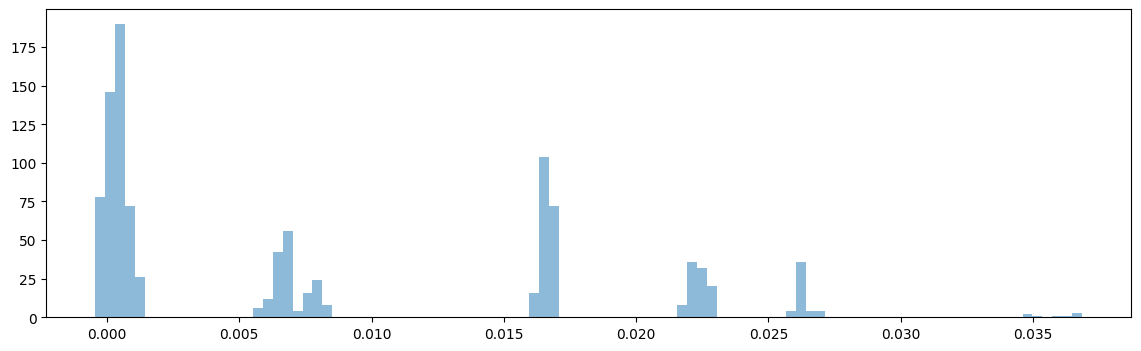

In [163]:
predictor.plot_covariances(bins=100)

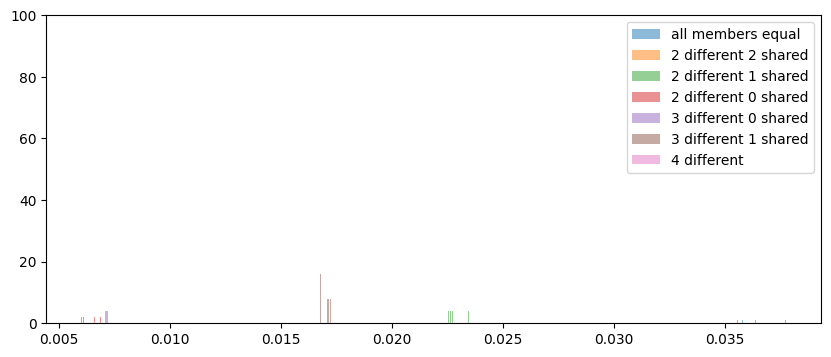

In [153]:
labels, masks = predictor.get_labels_and_masks_for_seven_cases(equal_instances=True)

fig, ax = plt.subplots(figsize=(10, 4))
for i, (mask, label) in enumerate(zip(masks, labels)):
    predictor.plot_covariances(mask, bins=50, ax=ax, label=label)

#ax.set_yscale("log")
ax.set_ylim([0, 100])
ax.legend()
plt.show()